# Monthly SMA

The Monthly SMA.

Entry and Exit Points  
Entry (Buy Signal): Buy when the S&P 500 closes above the 10-month moving  
average at the end of the month.

Exit (Sell Signal): Sell when the S&P 500 closes below the 10-month moving  
average at the end of the month.  

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1929, 10, 1) # 1928-10-31
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Define Optimizations

In [4]:
# pick one
optimize_sma  = True

# define SMAs ranges
if optimize_sma:
    Xs = range(5, 14+1, 1)

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'monthly_sma' : 10
}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_sma:
        options['monthly_sma'] = int(X)
        
    strategies[X] = strategy.Strategy(symbol, capital, start, end, options) 
    strategies[X].run()

5 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


6 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


7 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


8 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


9 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


10 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


11 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


12 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


13 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


14 

/home/fja0568/src/pinkfish/examples/095.monthly-sma/strategy.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = self.ts["close"].resample('M').last()  # 'M' ensures robustness


Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'expected_shortfall',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
df

,5,6,7,8,9,10,11,12,13,14
annual_return_rate,4.93,5.60,5.36,5.71,6.17,6.28,6.42,6.41,6.43,6.24
max_closed_out_drawdown,-49.42,-49.42,-45.05,-45.80,-42.66,-43.76,-48.17,-48.05,-50.82,-49.72
annualized_return_over_max_drawdown,0.10,0.11,0.12,0.12,0.14,0.14,0.13,0.13,0.13,0.13
drawdown_recovery_period,1219.00,1593.00,1161.00,1239.00,1132.00,990.00,1216.00,1532.00,1670.00,1551.00
expected_shortfall,-21.09,-19.12,-16.28,-25.19,-32.54,-21.93,-27.52,-27.52,-27.52,-27.52
best_month,22.41,22.42,22.41,22.42,22.42,22.41,22.41,22.41,22.42,22.42
worst_month,-29.52,-29.52,-29.55,-29.54,-29.53,-29.55,-29.54,-29.55,-29.55,-30.93
sharpe_ratio,0.45,0.50,0.48,0.51,0.54,0.55,0.56,0.56,0.56,0.54
sortino_ratio,0.44,0.50,0.48,0.50,0.54,0.55,0.55,0.56,0.56,0.54
monthly_std,3.31,3.26,3.30,3.33,3.34,3.33,3.40,3.39,3.40,3.45


Bar graphs

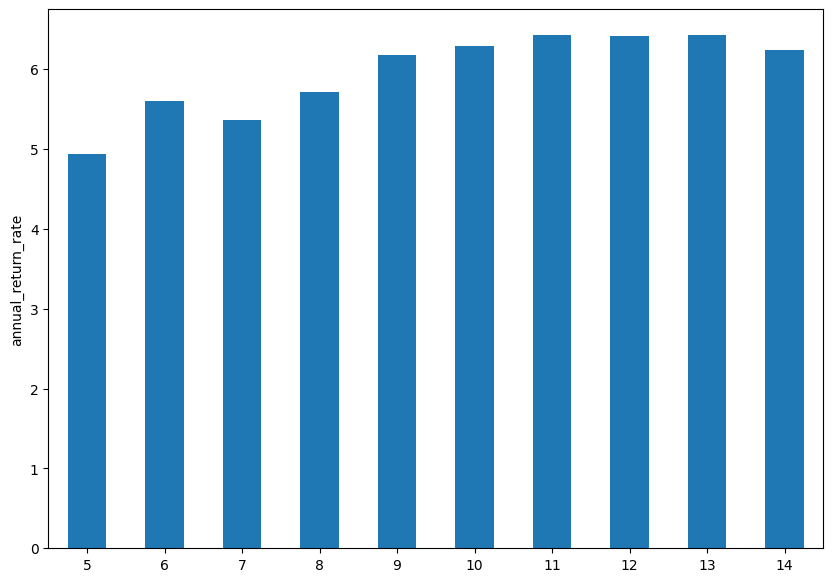

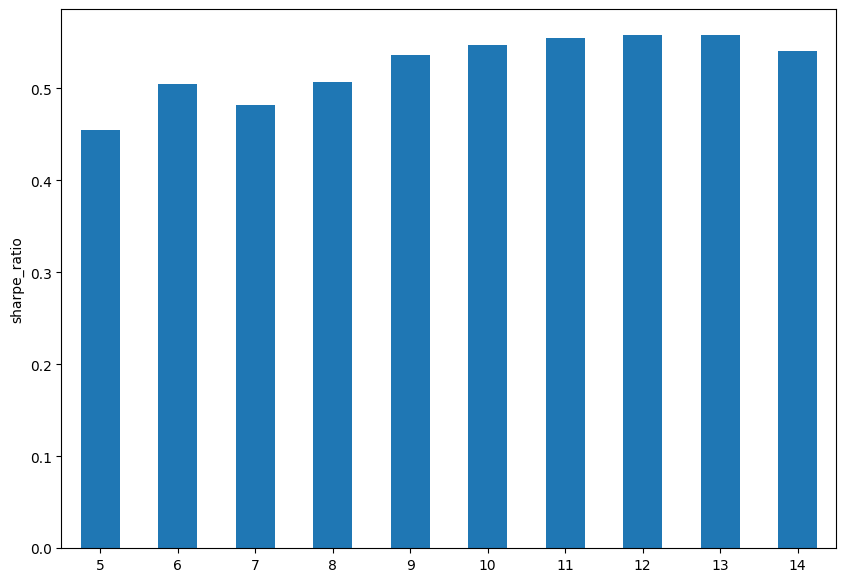

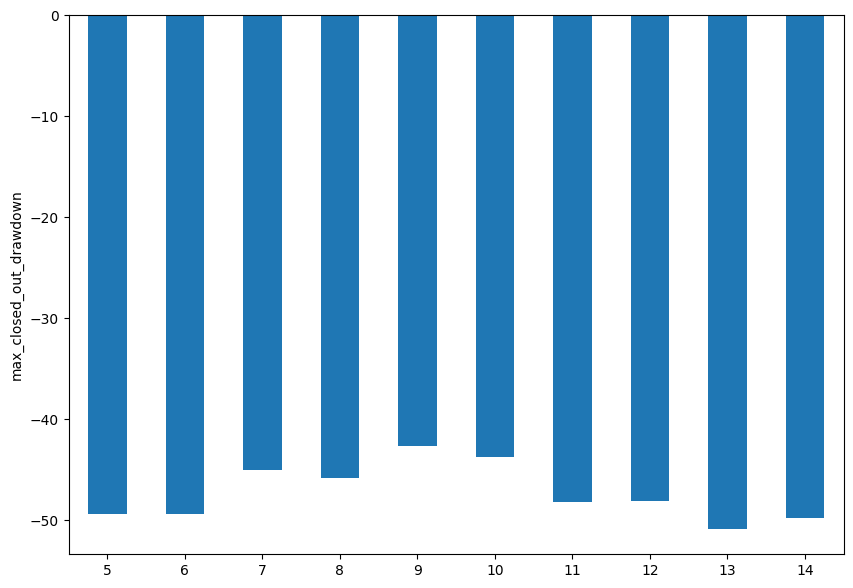

In [8]:
pf.optimizer_plot_bar_graph(df, 'annual_return_rate')
pf.optimizer_plot_bar_graph(df, 'sharpe_ratio')
pf.optimizer_plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

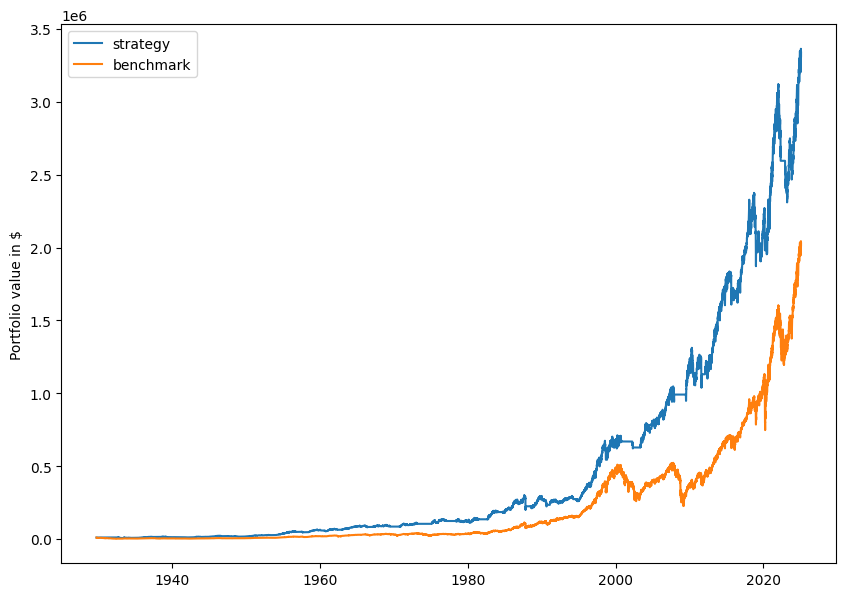

In [10]:
if optimize_sma:     Y = 10

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)